In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

In [204]:
data_dir = os.path.join('C:\\', 'Users', 'data', 'Documents', 'My_projects', 'Animals', 'dataset1')

data_train_path = os.path.join(data_dir, 'train')
data_test_path = os.path.join(data_dir, 'test')
data_val_path = os.path.join(data_dir, 'validation')

In [205]:
img_width = 180
img_height = 180

In [208]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle = True,
    image_size = (img_width, img_height),
    batch_size = 32,
    validation_split = False
)

Found 6300 files belonging to 9 classes.


In [209]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle = True,
    image_size = (img_width, img_height),
    batch_size = 32,
    validation_split = False
)

Found 1350 files belonging to 9 classes.


In [210]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle = True,
    image_size = (img_width, img_height),
    batch_size = 32,
    validation_split = False
)

Found 1350 files belonging to 9 classes.


In [211]:
data_cat = data_train.class_names
data_cat

['butterfly',
 'cow',
 'dog',
 'elephant',
 'hen',
 'horse',
 'sheep',
 'spider',
 'squirrel']

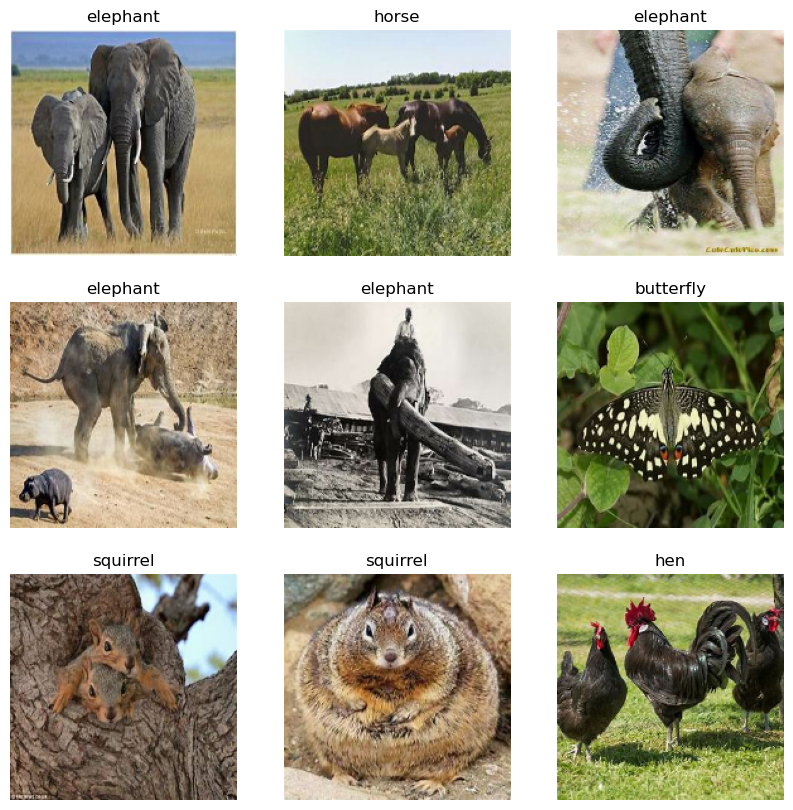

In [212]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3, i + 1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.axis('off')
        plt.title(data_cat[labels[i]])

In [213]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu', 
                 kernel_regularizer=regularizers.l2(0.0001)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu', 
                 kernel_regularizer=regularizers.l2(0.0001)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu', 
                 kernel_regularizer=regularizers.l2(0.0001)),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.7),
    layers.Dense(128),
    layers.Dense(units = len(data_cat))
])

In [215]:
model.compile(optimizer = 'adam', 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics = ['accuracy']
             )

In [185]:
epochs_size = 10
history = model.fit(
    data_train,
    validation_data = data_val,
    epochs = epochs_size,
)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 632ms/step - accuracy: 0.2442 - loss: 3.4814 - val_accuracy: 0.3542 - val_loss: 1.5802
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 596ms/step - accuracy: 0.2833 - loss: 1.5688 - val_accuracy: 0.3125 - val_loss: 1.4775
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 516ms/step - accuracy: 0.4164 - loss: 1.3894 - val_accuracy: 0.5833 - val_loss: 1.0307
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 568ms/step - accuracy: 0.6205 - loss: 1.0173 - val_accuracy: 0.8333 - val_loss: 0.7393
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 545ms/step - accuracy: 0.7185 - loss: 0.7651 - val_accuracy: 0.8333 - val_loss: 0.6838
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 514ms/step - accuracy: 0.8171 - loss: 0.6542 - val_accuracy: 0.8542 - val_loss: 0.4516
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 507ms/step - accuracy: 0.8289 - loss: 0.5054 - val_accuracy: 0.8750 - val_loss: 0.4292
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 515ms/step - accuracy: 0.8534 - loss: 0.4334 - val_accuracy: 0

Text(0.5, 1.0, 'Loss')

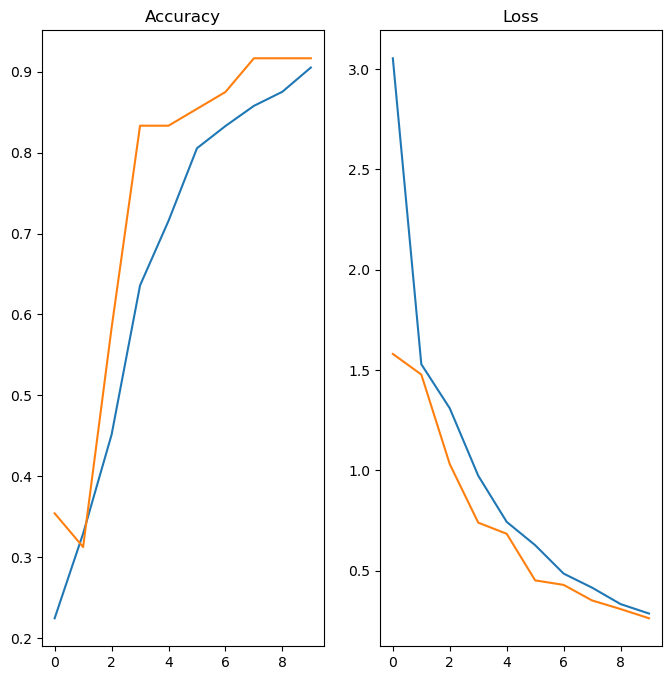

In [190]:
epochs_range = range(epochs_size)
plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, history.history['accuracy'], label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, history.history['loss'], label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')

In [191]:
image = ('C:\\Users\\data\\Documents\\cat.jpg')
image = tf.keras.utils.load_img(image, target_size = (img_height, img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr, 0)

In [193]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


In [196]:
score = tf.nn.softmax(predict)

In [198]:
print('Animal in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)], np.max(score) * 100))

Animal in image is banana with accuracy of 32.33


In [200]:
model.save('Image_class_anim.keras')